This notebook can be used to see how the functionality to deal with Healpix Tiles can be used. 
More specifically, this notebook shows 
- How to obtain points on the edges of Healpixels and demonstrate that this matches Healpy drawings
- How to draw Healpixels on a basemap plot

In [1]:
from opsimsummary import healpix_boundaries

In [2]:
import numpy as np

In [3]:
import healpy as hp

In [4]:
%matplotlib inline

###  Demo showing that a healpy mollview plot matches points claimed as boundaries

In [5]:
ipix  = np.array([11])

In [6]:
lon, lat = healpix_boundaries(ipix, nside=4, units='radians', nest=True, step=2)

The return of this funciton is a tuple of lon and lat

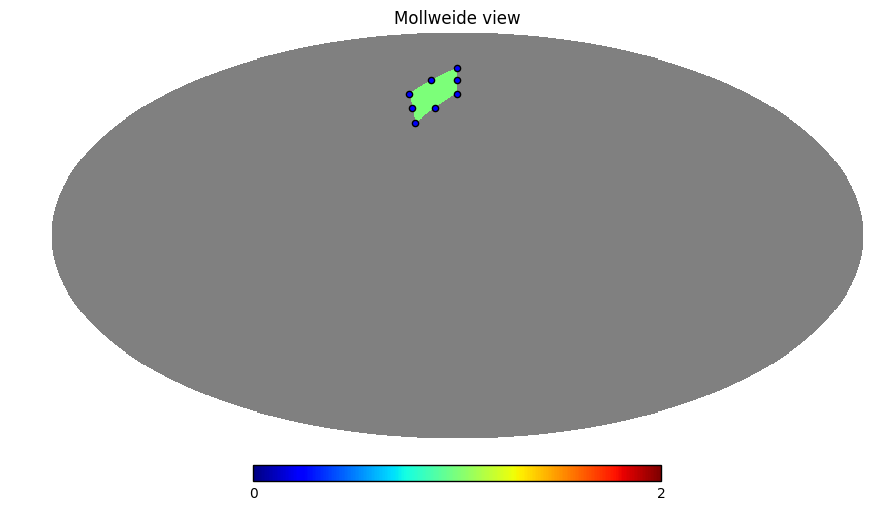

In [7]:
arr = np.ones(hp.nside2npix(4)) * hp.UNSEEN
arr[ipix] = 1
hp.mollview(arr, nest=True)
hp.projscatter(lat, lon)

How to get more points?

In [8]:
lon, lat = healpix_boundaries(ipix, nside=4, units='radians', nest=True, step=3)

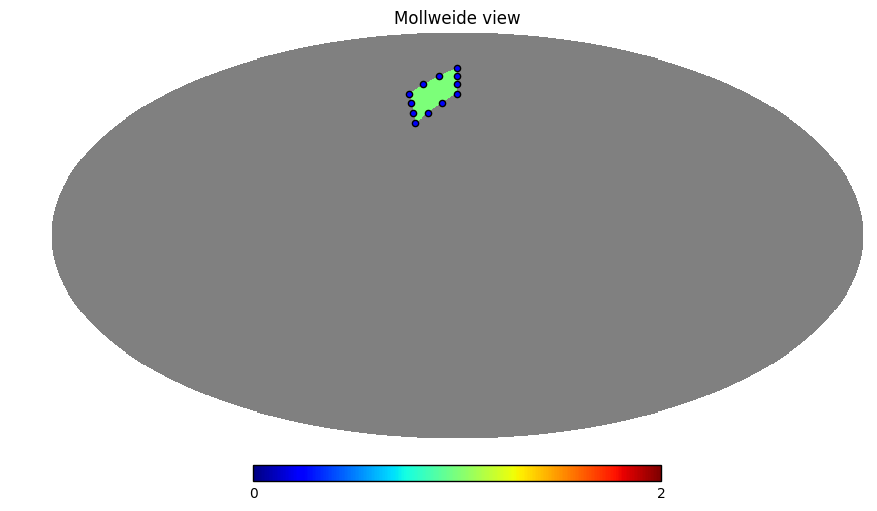

In [9]:
arr = np.ones(hp.nside2npix(4)) * hp.UNSEEN
arr[ipix] = 1
hp.mollview(arr, nest=True)
hp.projscatter(lat, lon)

In [10]:
lon

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.15707963,
        0.28559933,  0.39269908,  0.428399  ,  0.4712389 ,  0.52359878,
        0.39269908,  0.22439948])

###  Draw a Healpix in basemap

In [11]:
from opsimsummary import HPTileVis, HealpixTiles

In [12]:
hptiles = HealpixTiles(preComputedMap='/Users/rbiswas/data/LSST/OpSimData/healpixelized_MINION_1016_256_64_indexed.db',
                       nside=256)

In [13]:
hptvis = HPTileVis(hptiles, None)

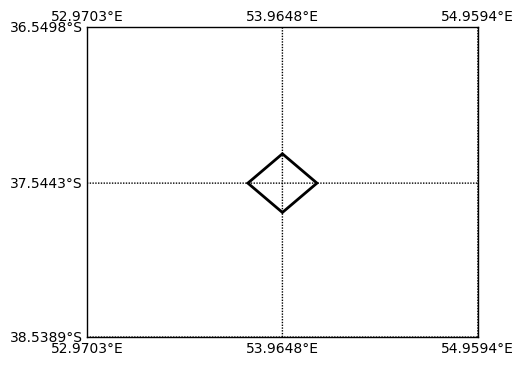

In [31]:
fig, tile_center, _  = hptvis.plotTilePointings((552466), projection='cea', paddingFactors=0.5, ax=None,drawPointings=False
                        ,
                                       **dict(fill=False, color='g', alpha=0.01)
                         )

In [30]:
hp.get_all_neighbours(256,theta=552466, nest=True)

array([552455, 552461, 552472, 552473, 552467, 552465, 552464, 552453])

In [32]:
for ipix in hp.get_all_neighbours(256, theta=552466, nest=True):
    _, _, _ = hptvis.plotTilePointings(ipix, tile_centers=tile_center, projection='cea', paddingFactors=0.5, ax=fig.axes[0],drawPointings=False
                        ,
                                       **dict(fill=False, color='g', alpha=0.01)
                         )

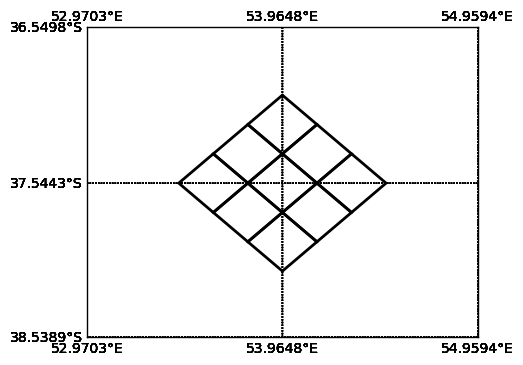

In [33]:
fig